In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/best-segmentation-model/best_segmentation_model.pth
/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0012706.jpg
/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0010192.jpg
/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0010017.jpg
/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0013000.jpg
/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0013166.jpg
/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0003308.jpg
/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0012332.jpg
/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0014291.jpg
/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Inp

In [3]:
from pathlib import Path 
path = Path("/kaggle/input/isic2018-challenge-task1-data-segmentation/")
train_dir = path/"ISIC2018_Task1-2_Training_Input/"
validation_dir = path/"ISIC2018_Task1-2_Validation_Input/"
test_dir = path/"ISIC2018_Task1-2_Test_Input/"



train_dir , validation_dir , test_dir 



(PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input'),
 PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Validation_Input'),
 PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Test_Input'))

In [4]:
import random 
from PIL import Image 

random.seed(42)

image_path_list = list(path.glob('*/*.jpg'))
image_path_list[:10]

[PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0012706.jpg'),
 PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0010192.jpg'),
 PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0010017.jpg'),
 PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0013000.jpg'),
 PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0013166.jpg'),
 PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0003308.jpg'),
 PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0012332.jpg'),
 PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0014291.jpg'),
 PosixPath('/kaggle/input/isic20

In [5]:
random_image_path = random.choice(image_path_list)
print(random_image_path)
img = Image.open(random_image_path)



/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Test_Input/ISIC_0015104.jpg


In [6]:
train_images = list(train_dir.glob("*.jpg"))
validation_images = list(validation_dir.glob("*.jpg"))
test_images = list(test_dir.glob("*.jpg"))


In [7]:
train_images , validation_images , test_images

([PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0012706.jpg'),
  PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0010192.jpg'),
  PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0010017.jpg'),
  PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0013000.jpg'),
  PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0013166.jpg'),
  PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0003308.jpg'),
  PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0012332.jpg'),
  PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0014291.jpg'),
  PosixPath('/kaggle/inp

In [8]:
print("No of Training Images : " , len(train_images))
print("No of Validation Images : " , len(validation_images))
print("No of Test Images : " , len(test_images))


No of Training Images :  2594
No of Validation Images :  100
No of Test Images :  1000


In [9]:
import matplotlib.pyplot as plt
import random
from PIL import Image

def plot_images(images: list):
    plt.figure(figsize=(15, 7))
    random_image_paths = random.sample(images, 6)

    for i in range(6):
        plt.subplot(2, 3, i+1)
        img = Image.open(random_image_paths[i])
        plt.imshow(img)
        plt.axis("off")   # hide axes for better visualization
         # show filename as title

    plt.tight_layout()
    plt.show()


In [10]:
# plot_images(train_images)

In [11]:
# plot_images(validation_images)

In [12]:
# plot_images(test_images)

In [13]:
label_directory = path/"ISIC2018_Task1_Training_GroundTruth"
label_directory

PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1_Training_GroundTruth')

In [14]:
labels = list(label_directory.glob("*.png"))
print("Labelled Images : " , len(labels))

Labelled Images :  2594


In [15]:
labels[0], train_images[0]

(PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1_Training_GroundTruth/ISIC_0000505_segmentation.png'),
 PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0012706.jpg'))

In [16]:
import os

# Example lists

# Create a dictionary mapping ID -> mask path
mask_dict = {os.path.basename(p).split("_segmentation")[0]: p for p in labels}


In [17]:
image_mask_pairs = []

for img_path in train_images:
    img_id = os.path.basename(img_path).split(".")[0]   # e.g., "ISIC_0000000"
    if img_id in mask_dict:
        image_mask_pairs.append((img_path, mask_dict[img_id]))


In [18]:
image_mask_pairs

[(PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0012706.jpg'),
  PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1_Training_GroundTruth/ISIC_0012706_segmentation.png')),
 (PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0010192.jpg'),
  PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1_Training_GroundTruth/ISIC_0010192_segmentation.png')),
 (PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0010017.jpg'),
  PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1_Training_GroundTruth/ISIC_0010017_segmentation.png')),
 (PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0013000.jpg'),
  PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1_Trainin

In [19]:
len(image_mask_pairs)

2594

In [20]:
image_mask_pairs[0]

(PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1-2_Training_Input/ISIC_0012706.jpg'),
 PosixPath('/kaggle/input/isic2018-challenge-task1-data-segmentation/ISIC2018_Task1_Training_GroundTruth/ISIC_0012706_segmentation.png'))

In [21]:
import random
import matplotlib.pyplot as plt
from PIL import Image

def plot_data(images):  
    # images is a list of (image_path, mask_path) tuples
    random_images = random.sample(images, 6)

    plt.figure(figsize=(12, 18))  # Adjust height for 6 rows

    for i, (img_path, mask_path) in enumerate(random_images):
        # Plot the image
        plt.subplot(6, 2, 2*i + 1)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis("off")
        plt.title("Image")

        # Plot the corresponding mask
        plt.subplot(6, 2, 2*i + 2)
        mask = Image.open(mask_path)
        plt.imshow(mask, cmap="gray")  # mask in grayscale
        plt.axis("off")
        plt.title("Mask")

    plt.tight_layout()
    plt.show()


In [22]:
# plot_data(image_mask_pairs)

In [23]:
import os
from PIL import Image
from collections import Counter

# Change this to your ISIC 2018 training images folder


sizes = []

# for filename in os.listdir(path/):
#     if filename.endswith(".jpg"):   # images are in JPG
#         img_path = os.path.join(, filename)
#         with Image.open(img_path) as img:
#             sizes.append(img.size)   # (width, height)

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
      if filename.endswith(".jpg"):
        img_path = os.path.join(dirname, filename)
        
        with Image.open(img_path) as img : 
            sizes.append(img.size)
# Count how many times each resolution appears
size_counts = Counter(sizes)

print("Unique image sizes:", len(size_counts))
print("\nMost common sizes:")
for size, count in size_counts.most_common(10):
    print(f"{size}: {count} images")

# Optional: get min & max dimensions
widths, heights = zip(*sizes)
print("\nMin size:", min(widths), "x", min(heights))
print("Max size:", max(widths), "x", max(heights))


Unique image sizes: 287

Most common sizes:
(1024, 768): 584 images
(4288, 2848): 570 images
(3072, 2304): 467 images
(3008, 2000): 392 images
(640, 480): 333 images
(3872, 2592): 169 images
(2048, 1536): 113 images
(3024, 2016): 100 images
(767, 576): 63 images
(1504, 1129): 50 images

Min size: 576 x 480
Max size: 6828 x 4519


In [24]:
import torch 
from torch import nn 

import torchvision 
from torchvision import transforms 
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt 


In [25]:
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


In [26]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import torchvision.transforms.functional as TF
from PIL import Image
import numpy as np

class ImageFolderCustom(Dataset):
    def __init__(self, image_dict: dict, size=(512, 512)):
        self.train_img = []
        self.mask_img = []

        # collect paths
        for img, mask in image_dict:
            self.train_img.append(img)
            self.mask_img.append(mask)

        # resize
        self.resize = transforms.Resize(size, interpolation=transforms.InterpolationMode.BILINEAR)

        # define augmentations
        self.augmentations = [
            "none", "hflip", "vflip",
            "rot90", "rot180", "rot270",
            "rot90_hflip", "rot90_vflip"
        ]

    def __len__(self):
        # expand dataset 8×
        return len(self.train_img) * len(self.augmentations)

    def load_image(self, index: int):
        image_path = self.train_img[index]
        mask_path = self.mask_img[index]
        return Image.open(image_path).convert("RGB"), Image.open(mask_path).convert("L")

    def __getitem__(self, index: int):
        # which base image + which augmentation
        img_idx = index // len(self.augmentations)
        aug_idx = index % len(self.augmentations)

        img, mask = self.load_image(img_idx)

        # resize
        img = self.resize(img)
        mask = self.resize(mask)

        # apply augmentation
        choice = self.augmentations[aug_idx]
        if choice == "hflip":
            img, mask = TF.hflip(img), TF.hflip(mask)
        elif choice == "vflip":
            img, mask = TF.vflip(img), TF.vflip(mask)
        elif choice == "rot90":
            img, mask = TF.rotate(img, 90), TF.rotate(mask, 90)
        elif choice == "rot180":
            img, mask = TF.rotate(img, 180), TF.rotate(mask, 180)
        elif choice == "rot270":
            img, mask = TF.rotate(img, 270), TF.rotate(mask, 270)
        elif choice == "rot90_hflip":
            img, mask = TF.hflip(TF.rotate(img, 90)), TF.hflip(TF.rotate(mask, 90))
        elif choice == "rot90_vflip":
            img, mask = TF.vflip(TF.rotate(img, 90)), TF.vflip(TF.rotate(mask, 90))
        # "none" → do nothing

        # to tensors
        img = TF.to_tensor(img)
        mask = torch.tensor(np.array(mask), dtype=torch.long)

        return img, mask, choice   # choice is useful for debugging


Dataset length: 20752


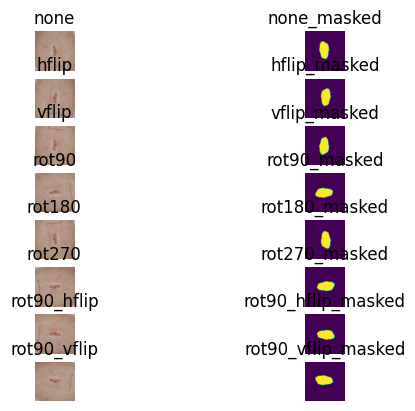

In [27]:
dataset = ImageFolderCustom(image_mask_pairs)
print("Dataset length:", len(dataset))   # should be N × 8

# check first 8 augmentations of the same image
for i in range(8):
    img, mask, aug = dataset[i]
    # print(f"idx={i}, aug={aug}, img shape={img.shape}, mask shape={mask.shape}")
    img = img.permute(1,2,0)
    mask = mask.numpy()
    
    plt.subplot(8 , 2 , 2*i +1)
    plt.imshow(img)
    plt.title(f"{aug}")
    plt.axis("off")
    plt.subplot(8 , 2 , 2*i + 2)
    plt.imshow(mask)
    plt.title(f"{aug}_masked")
    plt.axis("off")


In [28]:
#Converting Our DataSet into a dataloader 
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset = dataset , batch_size = 8 , num_workers = os.cpu_count() , 
                              shuffle = True)
len(train_dataloader)

    


2594

In [29]:
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
val_size   = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


In [30]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader   = DataLoader(val_dataset, batch_size=8)


In [31]:
print("Train data size : " , len(train_loader)) 
print("Test Data size : ", len(test_loader) )

Train data size :  2076
Test Data size :  519


In [32]:
imgs , masks  , augs = next(iter(train_dataloader))
print("Images Shape : " , imgs.shape)
print("Masks Shape : " , masks.shape)
print("Augs Length : " , len(augs) )

Images Shape :  torch.Size([8, 3, 512, 512])
Masks Shape :  torch.Size([8, 512, 512])
Augs Length :  8


In [33]:
import torch
import torch.nn as nn

class SpatialAttention(nn.Module): 
    def __init__(self, in_channels=64): 
        super(SpatialAttention, self).__init__()

        self.layer = nn.Sequential(
            # Encoder (downsampling)
            nn.Conv2d(in_channels, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True), 
            nn.Conv2d(32, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),

            # Decoder (upsampling)
            nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True), 
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1), 
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True), 
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1), 
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True), 
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1), 
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True), 
            nn.Conv2d(32, 1, kernel_size=3, stride=1, padding=1), 
            nn.Sigmoid()
        )

    def forward(self, x): 
        return self.layer(x)


In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ChannelAttention(nn.Module):
    def __init__(self, in_channels=64, reduction=16):
        super(ChannelAttention, self).__init__()

        # Four conv layers with stride=2
        self.context_conv = nn.Sequential(
            nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
        )

        # Excitation module (bottleneck FC layers)
        self.fc = nn.Sequential(
            nn.Linear(in_channels, in_channels // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(in_channels // reduction, in_channels, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        # Context extraction
        out = self.context_conv(x)        # (B, C, H/16, W/16)

        # Global average pooling
        b, c, h, w = out.size()
        gap = F.adaptive_avg_pool2d(out, 1).view(b, c)   # (B, C)

        # Fully connected excitation
        attn = self.fc(gap).view(b, c, 1, 1)             # (B, C, 1, 1)

        return attn


In [35]:
import torch.nn.functional as F 

class HRFB(nn.Module):

    def __init__(self , in_channels = 64):
        super(HRFB , self ).__init__()


        #Main branch : conv keeps same size 
        self.main_conv  = nn.Conv2d(in_channels , in_channels , kernel_size = 3 , stride = 1 , padding =1 )

        #Spatial attention branch 
        self.spatial_attn = SpatialAttention()
        

        #Channel attention branch (Squeeze - and Excitaion style)

        self.channel_attn = ChannelAttention()
        

    def forward(self , x):

        main = self.main_conv(x)

        spatial = self.spatial_attn(x)
        main = main* spatial

        channel = self.channel_attn(x)
        main = main*channel

        out = main + x
        return out  , spatial 

In [36]:
class FinalClassifier(nn.Module): 

    def __init__(self , in_channels = 64 , out_channels = 2 ): 

        super(FinalClassifier , self ).__init__()
        self.conv = nn.Conv2d(in_channels , out_channels , kernel_size = 1 , stride = 1 , padding = 0 )

    def forward(self , x): 
        return self.conv(x)
        

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SegmentationModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # Encoder
        self.conv1 = nn.Conv2d(3, 32, 3, stride=2, padding=1)   # 512 -> 256
        self.bn1   = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)  # 256 -> 128
        self.bn2   = nn.BatchNorm2d(64)
        self.relu  = nn.ReLU(inplace=True)

        # HRFB stack (assumes HRFB(in)->out same shape)
        self.hrfb_1 = HRFB()
        self.hrfb_2 = HRFB()
        self.hrfb_3 = HRFB()

        # Final 1x1 conv to 2 classes (background, lesion)
        self.final_layer = FinalClassifier(in_channels=64, out_channels=2)

    @staticmethod
    def upsample_logits_then_argmax(logits, scale_factor=4 , return_logits = False ):
        # logits: (B,2,H,W) @128x128 -> upsample to 512x512 then argmax
        up_logits = F.interpolate(logits, scale_factor=scale_factor,
                                  mode="bilinear", align_corners=True)

        if return_logits : 
            return up_logits 
        else : 
            mask = torch.argmax(up_logits, dim=1)  # (B, 512, 512)
            return  mask

    # Inference helper: returns full-res binary mask
    def predict(self, x):
        logits = self.forward(x, return_logits=True)        # (B,2,128,128)
        mask   = self.upsample_logits_then_argmax(logits, 4)  # (B,512,512)
        return mask

    # Forward for training/inference control
    def forward(self, x, return_logits=False):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x)))      # (B,64,128,128)

        x , att1  = self.hrfb_1(x)
        x , att2  = self.hrfb_2(x)
        x , att3 = self.hrfb_3(x)

        logits = self.final_layer(x)                # (B,2,128,128)

        

        if return_logits:
            up_logits = self.upsample_logits_then_argmax(logits , 4  , return_logits )
            return up_logits ,  [att1 , att2 , att3]                        # use with loss (BCE/CE)
        else:
            mask = self.upsample_logits_then_argmax(logits , 4  , return_logits )
            return mask 


In [38]:
x = torch.randint(0 , 256 , (1, 3 , 512 , 512 ) , dtype =  torch.float32) 
x 

tensor([[[[ 72., 221.,  31.,  ..., 154., 187.,  61.],
          [ 45.,  48., 218.,  ...,  64., 113.,  77.],
          [100., 135.,  31.,  ...,  60., 243., 251.],
          ...,
          [  2., 116., 253.,  ...,  18., 124., 147.],
          [190., 206., 206.,  ..., 108.,  98.,  86.],
          [ 92., 141., 253.,  ..., 110.,  14., 223.]],

         [[ 22., 181.,  51.,  ..., 198.,  60.,  31.],
          [  2.,  71., 109.,  ..., 198., 144., 180.],
          [229., 141., 208.,  ..., 146., 247.,  40.],
          ...,
          [123., 196., 152.,  ..., 197., 180., 155.],
          [125., 222.,  32.,  ..., 149.,  39., 217.],
          [ 92., 110., 103.,  ...,  93.,  72., 234.]],

         [[ 85.,  67., 228.,  ...,  28.,  89., 150.],
          [221.,  41., 226.,  ..., 234.,  40.,  34.],
          [177.,  96., 134.,  ...,  55.,  86.,  14.],
          ...,
          [ 78., 228.,  20.,  ...,  34.,  42., 123.],
          [242., 166., 132.,  ...,  61., 116.,  13.],
          [149., 169., 139.,  ...

In [39]:
def two_channel_logits_to_lesion_prob(logits_2ch):
    # logits_2ch: (B, 2, H, W)
    probs = F.softmax(logits_2ch, dim=1)  # (B,2,H,W)
    lesion_prob = probs[:, 1:2, :, :]     # take channel 1 (lesion), keep dims
    return lesion_prob


In [40]:
# import torch
# import torch.nn.functional as F

# def weighted_bce_loss(y_pred_prob, y_true, w_t=0.75):
#     """
#     y_pred_prob: (B, 1, H, W) after sigmoid, values in [0,1]
#     y_true:      (B, 1, H, W) ground truth mask with {0,1}
#     w_t:         scalar weight for lesion pixels
#     returns:     scalar loss
#     """
#     # clamp to avoid log(0)
#     eps = 1e-8
#     y_pred_prob = torch.clamp(y_pred_prob, eps, 1. - eps)

#     # lesion term = y * log(p)
#     lesion_term = w_t * y_true * torch.log(y_pred_prob)

#     # background term = (1-y)*log(1-p)
#     background_term = (1 - w_t) * (1 - y_true) * torch.log(1 - y_pred_prob)

#     # full loss per pixel (negative sign)
#     loss_per_pixel = -(lesion_term + background_term)

#     # average over batch and spatial dims (B,1,H,W)
#     return loss_per_pixel.mean()


In [41]:
# def attention_mse_loss(att_map, y_true):
#     """
#     att_map: (B, 1, H, W) from HRFB spatial attention branch, values in [0,1] (after sigmoid)
#     y_true:  (B, 1, H, W) ground truth mask in {0,1}
#     returns: scalar loss
    
#     """
#     att_up = F.interpolate(att_map, size=y_true.shape[-2:], mode='bilinear', align_corners=True)
#     return F.mse_loss(att_up, y_true)


In [42]:
# def compute_total_loss(logits_2ch, att_maps, y_true, w_t=0.75):
#     """
#     logits_2ch: (B, 2, H, W) final segmentation logits from model
#     att_maps:   list of K attention maps, each (B,1,H,W)
#     y_true:     (B,1,H,W) ground truth mask in {0,1}
#     """

#     # 1. lesion probability map ȳ_hat from logits
#     y_pred_prob = two_channel_logits_to_lesion_prob(logits_2ch)  # (B,1,H,W)

#     # 2. main segmentation loss (weighted BCE)
#     bce = weighted_bce_loss(y_pred_prob, y_true, w_t=w_t)

#     # 3. attention supervision losses
#     mse_list = []
#     for att in att_maps:
#         mse_list.append(attention_mse_loss(att, y_true))  # each scalar

#     # average over K HRFBs
#     K = len(mse_list)
#     mse_term = sum(mse_list) / K if K > 0 else 0.0

#     # 4. final training loss
#     total_loss = bce + mse_term
#     return total_loss, bce, mse_term


In [43]:
import torch
import torch.nn.functional as F

# --------------------- CROSS ENTROPY ---------------------
def custom_cross_entropy_loss(logits, target, weight_bg=0.25, weight_fg=0.75):
    """
    logits: (B, 2, H, W) - raw model outputs
    target: (B, 1, H, W) or (B, H, W) - binary ground truth {0,1}
    weight_bg, weight_fg: class weights for imbalance
    returns: scalar loss
    """

    # ensure shape (B, H, W)
    if target.dim() == 4:
        target = target.squeeze(1)

    target = target.long()  # CrossEntropy needs integer labels

    # log-softmax for numerical stability
    log_probs = F.log_softmax(logits, dim=1)  # (B, 2, H, W)

    # pick correct class log-probs
    loss_per_pixel = -log_probs.gather(1, target.unsqueeze(1))  # (B, 1, H, W)

    # apply class weighting
    weights = torch.zeros_like(loss_per_pixel)
    weights[target.unsqueeze(1) == 0] = weight_bg
    weights[target.unsqueeze(1) == 1] = weight_fg

    weighted_loss = loss_per_pixel * weights

    return weighted_loss.mean()


# --------------------- ATTENTION MSE ---------------------
def attention_mse_loss(att_map, y_true):
    """Matches spatial attention map to ground truth mask"""
    att_up = F.interpolate(att_map, size=y_true.shape[-2:], mode='bilinear', align_corners=True)
    att_up = torch.clamp(att_up, 0.0, 1.0)
    return F.mse_loss(att_up, y_true)


# --------------------- TOTAL LOSS ---------------------
def compute_total_loss_from_logits_up(logits_up_2ch, att_maps, y_true, weight_bg=0.25, weight_fg=0.75):
    """
    logits_up_2ch: (B, 2, 512, 512) logits from model(return_logits=True)
    att_maps: list of (B,1,128,128) attention maps
    y_true: (B,1,512,512) float {0,1}
    """
    # convert mask to long for CE (class indices)
    ce = custom_cross_entropy_loss(logits_up_2ch, y_true, weight_bg, weight_fg)

    # attention MSE (keep mask as float)
    mse_terms = [attention_mse_loss(att, y_true) for att in att_maps]
    mse_mean = sum(mse_terms) / max(1, len(mse_terms))

    total = ce + mse_mean
    return total, ce, mse_mean


In [ ]:
import torch
import torch.nn.functional as F

device = torch.device(
    "cuda" if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available()
    else "cpu"
)
print("Using device:", device)

# Initialize model and optimizer
model = SegmentationModelV0().to(device)
state_dict = torch.load("/kaggle/input/best-segmentation-model/best_segmentation_model.pth", map_location="cuda")

# apply the weights
model.load_state_dict(state_dict)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 6

# Tracking losses
loss_values = [0.16332  ]
ce_loss_values = [0.09597 ]
mse_loss_values = [0.06735 ]

best_loss = float('inf')  # For early stopping

for epoch in range( 1, num_epochs):
    model.train()
    total_loss = 0.0
    total_ce_loss = 0.0
    total_mse_loss = 0.0

    for images, masks, aug_choice in train_loader:
        images = images.to(device).float()
        masks = masks.to(device).float().unsqueeze(1)
        masks = (masks / 255.0).clamp(0, 1)

        # Forward pass
        logits, att_maps = model(images, return_logits=True)

        # Compute losses
        loss, ce, mse = compute_total_loss_from_logits_up(logits, att_maps, masks)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate losses
        total_loss += loss.item()
        total_ce_loss += ce.item()
        total_mse_loss += mse.item()

    # Compute epoch averages
    loss_item = total_loss / len(train_loader)
    ce_item = total_ce_loss / len(train_loader)
    mse_item = total_mse_loss / len(train_loader)

    loss_values.append(loss_item)
    ce_loss_values.append(ce_item)
    mse_loss_values.append(mse_item)

    print(f"Epoch [{epoch+1}/{num_epochs}] | Total={loss_item:.5f} | CE={ce_item:.5f} | MSE={mse_item:.5f}")

    # ---- Early stopping check ----
    if loss_item < best_loss:
        best_loss = loss_item
        torch.save(model.state_dict(), "/kaggle/working/best_segmentation_model.pth")

        print(f"✅ Model improved — saved at epoch {epoch+1}")
    else:
        print(f"⚠️ Loss increased at epoch {epoch+1}. Early stopping.")
        break

# model.load_state_dict(torch.load("/kaggle/input/<your-previous-run>/best_segmentation_model.pth"))
# To load the model afterwards 


Using device: cuda
Epoch [2/6] | Total=0.12760 | CE=0.07500 | MSE=0.05260
✅ Model improved — saved at epoch 2
Epoch [3/6] | Total=0.11705 | CE=0.06849 | MSE=0.04856
✅ Model improved — saved at epoch 3
Epoch [4/6] | Total=0.11051 | CE=0.06411 | MSE=0.04639
✅ Model improved — saved at epoch 4
Epoch [5/6] | Total=0.10575 | CE=0.06127 | MSE=0.04448
✅ Model improved — saved at epoch 5


In [46]:
import matplotlib.pyplot as plt

def plot_loss_curves(total_loss, ce_loss, mse_loss):
    """
    Plots Total, CE, and MSE loss curves across epochs.
    
    total_loss: list of total loss values per epoch
    ce_loss: list of cross-entropy loss values  per epoch
    mse_loss: list of attention MSE loss values per epoch
    """
    epochs = range(1, len(total_loss) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(epochs, total_loss, 'r-o', label='Total Loss')
    plt.plot(epochs, ce_loss, 'b--s', label='Cross-Entropy Loss')
    plt.plot(epochs, mse_loss, 'g-.^', label='MSE Loss')

    plt.title("Training Loss Curves")
    plt.xlabel("Epoch")
    plt.ylabel("Loss Value")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.savefig("loss_curve.png", dpi=300)
    plt.show()


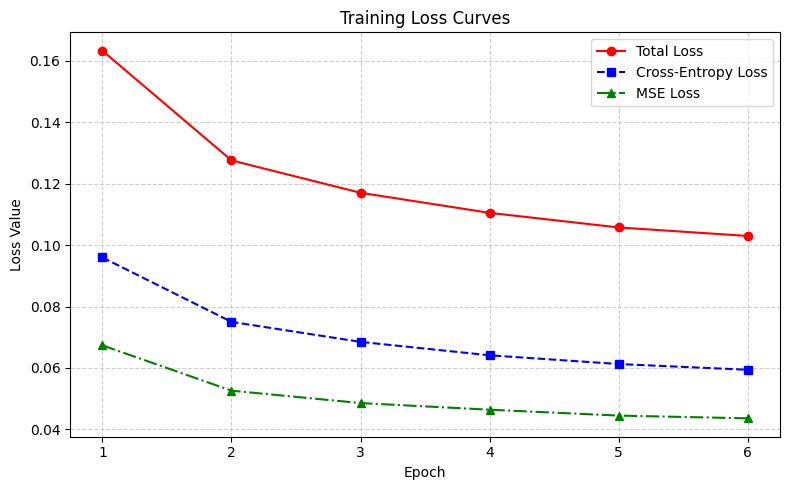

In [47]:
plot_loss_curves(loss_values,    ce_loss_values,    mse_loss_values)


In [48]:
import torch

def segmentation_metrics(y_pred, y_true, smooth=1e-6):
    """
    y_pred: predicted mask (B, H, W) or (B, 1, H, W)
    y_true: ground truth mask (B, H, W) or (B, 1, H, W)
    Values: {0,1}
    """

    # Ensure same shape
    if y_pred.ndim == 4:
        y_pred = y_pred.squeeze(1)
    if y_true.ndim == 4:
        y_true = y_true.squeeze(1)

    # Flatten
    y_pred_flat = y_pred.view(-1)
    y_true_flat = y_true.view(-1)

    # Convert to float
    y_pred_flat = y_pred_flat.float()
    y_true_flat = y_true_flat.float()

    # Confusion matrix components
    TP = (y_pred_flat * y_true_flat).sum()
    TN = ((1 - y_pred_flat) * (1 - y_true_flat)).sum()
    FP = (y_pred_flat * (1 - y_true_flat)).sum()
    FN = ((1 - y_pred_flat) * y_true_flat).sum()

    # Metrics
    jaccard = (TP + smooth) / (TP + FP + FN + smooth)
    dice = (2 * TP + smooth) / (2 * TP + FP + FN + smooth)
    accuracy = (TP + TN + smooth) / (TP + TN + FP + FN + smooth)
    sensitivity = (TP + smooth) / (TP + FN + smooth)      # Recall
    specificity = (TN + smooth) / (TN + FP + smooth)

    return {
        "Jaccard": jaccard.item(),
        "Dice": dice.item(),
        "Accuracy": accuracy.item(),
        "Sensitivity": sensitivity.item(),
        "Specificity": specificity.item()
    }


In [51]:
import torch

train_ji = test_ji  = 0.0 
train_dc = test_dc = 0.0 
train_ac = test_ac = 0.0 
train_se = test_se = 0.0
train_sp = test_sp = 0.0 

model.eval()

# ---------------- Train metrics ----------------
with torch.no_grad():
    for images, masks, aug_choice in train_loader:
        images = images.to(device).float()
        masks  = masks.to(device).float().unsqueeze(1)
        masks  = (masks / 255.0).clamp(0, 1)   # -> {0,1}

        # Forward pass (binary mask from model)
        y_train_pred = model(images, return_logits=False)  # (B, H, W)
        y_train_pred = y_train_pred.unsqueeze(1).float()   # (B,1,H,W) for metrics

        seg_metrics = segmentation_metrics(y_train_pred, masks)
        train_ji += seg_metrics["Jaccard"]
        train_dc += seg_metrics["Dice"]
        train_ac += seg_metrics["Accuracy"]
        train_se += seg_metrics["Sensitivity"]
        train_sp += seg_metrics["Specificity"]

train_ji /= len(train_loader)
train_dc /= len(train_loader)
train_ac /= len(train_loader)
train_se /= len(train_loader)
train_sp /= len(train_loader)

print("Train -> JI:", train_ji, "DC:", train_dc, "AC:", train_ac, "SE:", train_se, "SP:", train_sp)

# ---------------- Test metrics + store predictions ----------------
test_samples = []   # will store (image, pred_mask, gt_mask) for visualization
max_store = 8       # how many test examples you want to keep

test_ji = test_dc = test_ac = test_se = test_sp = 0.0

with torch.no_grad():
    for images, masks, aug_choice in test_loader:
        images = images.to(device).float()
        masks  = masks.to(device).float().unsqueeze(1)
        masks  = (masks / 255.0).clamp(0, 1)

        y_test_pred = model(images, return_logits=False)   # (B,H,W)
        y_test_pred = y_test_pred.unsqueeze(1).float()     # (B,1,H,W)

        # metrics
        seg_metrics = segmentation_metrics(y_test_pred, masks)
        test_ji += seg_metrics["Jaccard"]
        test_dc += seg_metrics["Dice"]
        test_ac += seg_metrics["Accuracy"]
        test_se += seg_metrics["Sensitivity"]
        test_sp += seg_metrics["Specificity"]

        # store some examples for plotting
        if len(test_samples) < max_store:
            B = images.size(0)
            num_to_take = min(max_store - len(test_samples), B)
            for i in range(num_to_take):
                test_samples.append((
                    images[i].cpu(),          # image
                    y_test_pred[i].cpu(),     # predicted mask
                    masks[i].cpu()            # ground truth mask
                ))

test_ji /= len(test_loader)
test_dc /= len(test_loader)
test_ac /= len(test_loader)
test_se /= len(test_loader)
test_sp /= len(test_loader)

print("Test  -> JI:", test_ji, "DC:", test_dc, "AC:", test_ac, "SE:", test_se, "SP:", test_sp)


Train -> JI: 0.7164052784055299 DC: 0.8304353832968857 AC: 0.9198394990553057 SE: 0.9653711056835619 SP: 0.9066422980472532
Test  -> JI: 0.7079367596290015 DC: 0.824201951252013 AC: 0.9180145934367685 SE: 0.9622443732958079 SP: 0.9057349077998329


In [55]:
import pandas as pd

# Create a dictionary for comparison
metrics_dict = {
    "Metric": ["Jaccard Index", "Dice Coefficient", "Accuracy", "Sensitivity", "Specificity"],
    "Train": [train_ji, train_dc, train_ac, train_se, train_sp],
    "Test": [test_ji, test_dc, test_ac, test_se, test_sp]
}

# Convert to pandas DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Round values for readability
metrics_df = metrics_df.round(4)

# Display the DataFrame
print(metrics_df)


             Metric   Train    Test
0     Jaccard Index  0.7164  0.7079
1  Dice Coefficient  0.8304  0.8242
2          Accuracy  0.9198  0.9180
3       Sensitivity  0.9654  0.9622
4       Specificity  0.9066  0.9057


In [56]:
import matplotlib.pyplot as plt

def plot_test_results(samples, num_examples=4):
    """
    samples: list of (image, pred_mask, gt_mask) tuples
             image: (3,H,W), pred_mask: (1,H,W), gt_mask: (1,H,W)
    num_examples: how many examples to show
    """
    num_examples = min(num_examples, len(samples))
    plt.figure(figsize=(12, 3 * num_examples))

    for i in range(num_examples):
        img, pred, gt = samples[i]
        # convert to numpy for plotting
        img_np  = img.permute(1, 2, 0).numpy()        # (H,W,3)
        pred_np = pred.squeeze(0).numpy()             # (H,W)
        gt_np   = gt.squeeze(0).numpy()               # (H,W)

        # original image
        plt.subplot(num_examples, 3, 3*i + 1)
        plt.imshow(img_np)
        plt.title(f"Test #{i+1} - Image")
        plt.axis("off")

        # ground truth mask
        plt.subplot(num_examples, 3, 3*i + 2)
        plt.imshow(gt_np, cmap="gray")
        plt.title("Ground Truth Mask")
        plt.axis("off")

        # predicted mask
        plt.subplot(num_examples, 3, 3*i + 3)
        plt.imshow(pred_np, cmap="gray")
        plt.title("Predicted Mask")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


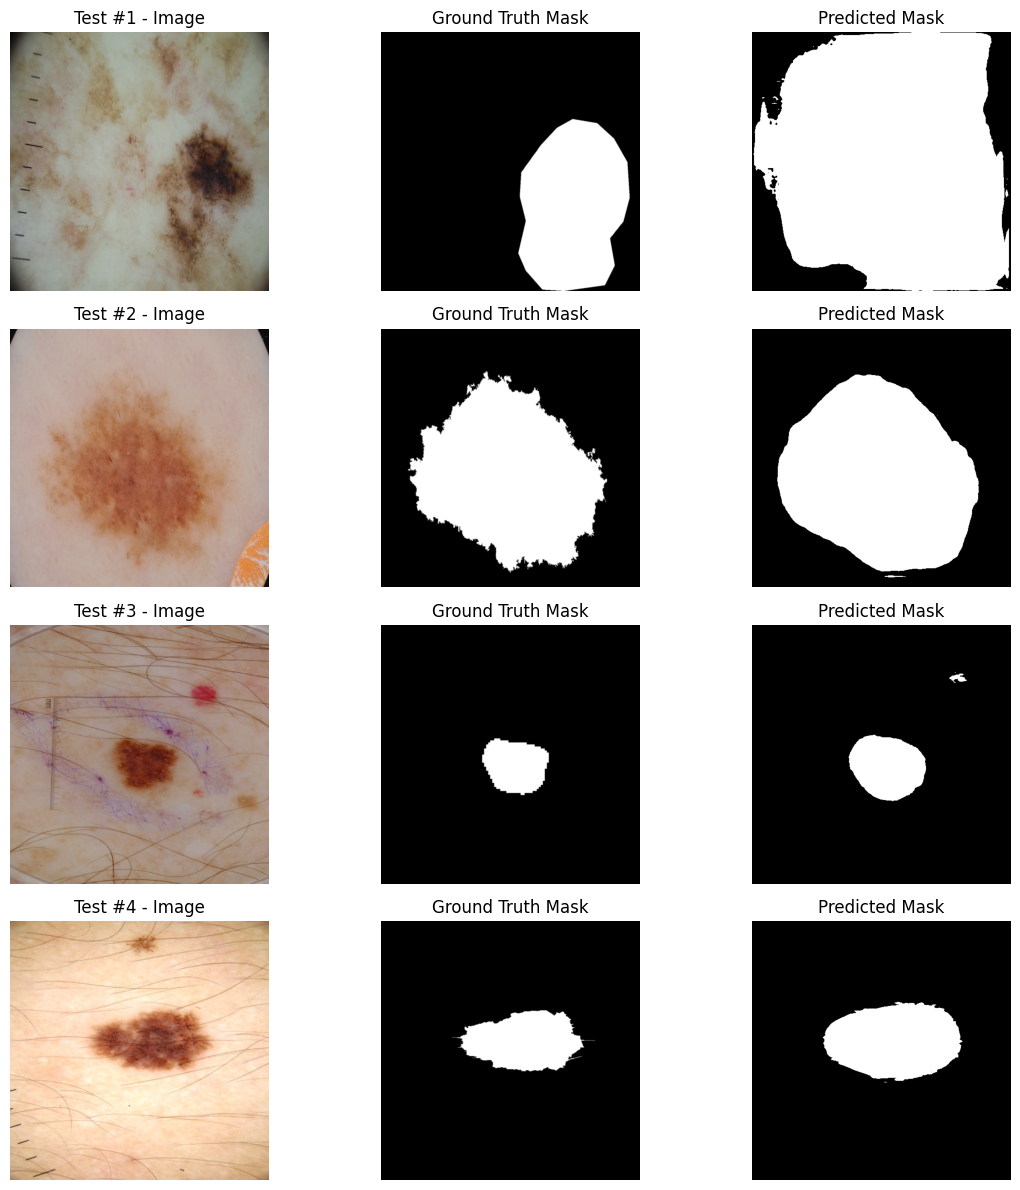

In [57]:
plot_test_results(test_samples, num_examples=4)
